<h1 style="color:DarkOrange">Road Accident</h1>

## <span style="color:MediumSeaGreen">Objectives</span>



CASUALTY OVERVIEW and BREAKDOWN

- Total Casualties
- Total Serious Casaulties
- Total Fatal Casaulties
- Total Slight Casaulties
- Total Casaulties by Car
- Casaulties By [Vehicle Types]


CASUALTY ANALYSIS BY VARIOUS FACTORS
- Monthly Casualties Trends
- Casualties by Road Type
- Casualties by Road Surface Condition
- Casualties by Location Type
- Casualties by Time of Day


## <span style="color:MediumSeaGreen">Import and Reading of data</span>

In [2]:
# Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data_path = '/workspaces/PythonSpace/Datasource/Project/Road_accident.xlsx'
df_raw = pd.read_excel(data_path)

In [4]:
df_raw.head(5)

,Accident_Index,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Carriageway_Hazards,...,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200901BS70001,2021-01-01,Thursday,Give way or uncontrolled,T or staggered junction,Serious,51.512273,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,One way street,30,15:11:00,Urban,Fine no high winds,Car
1,200901BS70002,2021-01-05,Monday,Give way or uncontrolled,Crossroads,Serious,51.514399,Daylight,Kensington and Chelsea,NaN,...,11,2,Metropolitan Police,Wet or damp,Single carriageway,30,10:59:00,Urban,Fine no high winds,Taxi/Private hire car
2,200901BS70003,2021-01-04,Sunday,Give way or uncontrolled,T or staggered junction,Slight,51.486668,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,Single carriageway,30,14:19:00,Urban,Fine no high winds,Taxi/Private hire car
3,200901BS70004,2021-01-05,Monday,Auto traffic signal,T or staggered junction,Serious,51.507804,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Frost or ice,Single carriageway,30,08:10:00,Urban,Other,Motorcycle over 500cc
4,200901BS70005,2021-01-06,Tuesday,Auto traffic signal,Crossroads,Serious,51.482076,Darkness - lights lit,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,Single carriageway,30,17:25:00,Urban,Fine no high winds,Car


## <span style="color:MediumSeaGreen">Data Cleaning</span>

In [5]:
df_unclean = df_raw
df_unclean.head()

,Accident_Index,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Carriageway_Hazards,...,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200901BS70001,2021-01-01,Thursday,Give way or uncontrolled,T or staggered junction,Serious,51.512273,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,One way street,30,15:11:00,Urban,Fine no high winds,Car
1,200901BS70002,2021-01-05,Monday,Give way or uncontrolled,Crossroads,Serious,51.514399,Daylight,Kensington and Chelsea,NaN,...,11,2,Metropolitan Police,Wet or damp,Single carriageway,30,10:59:00,Urban,Fine no high winds,Taxi/Private hire car
2,200901BS70003,2021-01-04,Sunday,Give way or uncontrolled,T or staggered junction,Slight,51.486668,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,Single carriageway,30,14:19:00,Urban,Fine no high winds,Taxi/Private hire car
3,200901BS70004,2021-01-05,Monday,Auto traffic signal,T or staggered junction,Serious,51.507804,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Frost or ice,Single carriageway,30,08:10:00,Urban,Other,Motorcycle over 500cc
4,200901BS70005,2021-01-06,Tuesday,Auto traffic signal,Crossroads,Serious,51.482076,Darkness - lights lit,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,Single carriageway,30,17:25:00,Urban,Fine no high winds,Car


In [6]:
# Remove column names not needed in analysis

columns_to_drop = ['Local_Authority_(District)', 'Carriageway_Hazards', 'Accident_Index', 'Latitude', 'Longitude', 'Carriageway_Hazards', 'Number_of_Vehicles', 'Police_Force', 'Speed_limit', 'Time', 'Weather_Conditions', 'Junction_Control', 'Junction_Detail']

# Checking if column name exist before droping it
for column in columns_to_drop:
    if column in df_unclean.columns:
        df_unclean = df_unclean.drop(columns = column)


In [7]:
# Rename column name

column_names = [ 'date', 'day', 'severity', 'light_condition', 'number_of_casualties', 'road_condition', 'road_type', 'location', 'vehicle_type']

df_unclean.columns = column_names

<span style="color:#f39c12"> Clean Date <span>

In [8]:
# Create a column for year
df_unclean['year'] = pd.to_datetime(df_unclean['date']).dt.year
df_unclean['month'] = pd.to_datetime(df_unclean['date']).dt.strftime('%b')


In [9]:
# Reorder coumns. Excluded date
df_unclean = df_unclean[['year', 'month', 'day', 'severity', 'light_condition', 'number_of_casualties', 'road_condition', 'road_type', 'location', 'vehicle_type']]

df_unclean = df_unclean.set_index('year').sort_index()

In [10]:
df_unclean.head()

,month,day,severity,light_condition,number_of_casualties,road_condition,road_type,location,vehicle_type
year,,,,,,,,,
2021,Jan,Thursday,Serious,Daylight,1,Dry,One way street,Urban,Car
2021,Jan,Monday,Serious,Daylight,11,Wet or damp,Single carriageway,Urban,Taxi/Private hire car
2021,Jan,Sunday,Slight,Daylight,1,Dry,Single carriageway,Urban,Taxi/Private hire car
2021,Jan,Monday,Serious,Daylight,1,Frost or ice,Single carriageway,Urban,Motorcycle over 500cc
2021,Jan,Tuesday,Serious,Darkness - lights lit,1,Dry,Single carriageway,Urban,Car


<span style="color:#f39c12"> Clean Severity <span>

In [11]:
# Get distinct values in the severity column
print(df_unclean['severity'].unique())

['Serious' 'Slight' 'Fetal' 'Fatal']


In [12]:
# Clean up severity column with replacement of values
if 'Fetal' in df_unclean['severity'].values:
    df_unclean.loc[df_unclean['severity'] == 'Fetal', 'severity'] = 'Fatal'

print(df_unclean['severity'].unique())

['Serious' 'Slight' 'Fatal']


<div style="color:DarkOrange">Light Condition</div>

In [13]:
# Get distinct values in the light condition column
print(df_unclean['light_condition'].unique())

['Daylight' 'Darkness - lights lit' 'Darkness - lighting unknown'
 'Darkness - lights unlit' 'Darkness - no lighting']


In [14]:
# Clean up light condition column with replacement of values
light_condition_darkness_errors = ['Darkness - lights lit', 'Darkness - lighting unknown',
       'Darkness - lights unlit', 'Darkness - no lighting']

for error in light_condition_darkness_errors:
    if error in df_unclean['light_condition'].values:
        df_unclean.loc[df_unclean['light_condition'] == error, 'light_condition'] = 'Darkness'

In [15]:
print(df_unclean['light_condition'].unique())

['Daylight' 'Darkness']


<div style="color:DarkOrange"> Clean number of casualties </div>

In [16]:
# Sort and print out unique values
distinct_num_of_casualties = [int(value) for value in df_unclean['number_of_casualties'].unique()]
print(sorted(distinct_num_of_casualties))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 24, 26, 27, 40, 42, 43, 48]


In [17]:
df_unclean.head()

,month,day,severity,light_condition,number_of_casualties,road_condition,road_type,location,vehicle_type
year,,,,,,,,,
2021,Jan,Thursday,Serious,Daylight,1,Dry,One way street,Urban,Car
2021,Jan,Monday,Serious,Daylight,11,Wet or damp,Single carriageway,Urban,Taxi/Private hire car
2021,Jan,Sunday,Slight,Daylight,1,Dry,Single carriageway,Urban,Taxi/Private hire car
2021,Jan,Monday,Serious,Daylight,1,Frost or ice,Single carriageway,Urban,Motorcycle over 500cc
2021,Jan,Tuesday,Serious,Darkness,1,Dry,Single carriageway,Urban,Car


<div style="color:DarkOrange">Clean Road Condition</div>

In [18]:
print(df_unclean['road_condition'].unique())

['Dry' 'Wet or damp' 'Frost or ice' 'Snow' 'Flood over 3cm. deep' nan]


In [19]:
# Clean up road condition column with replacement of values
road_condition_values = {'Wet or damp':'Damp', 'Frost or ice':'Frost', 'Flood over 3cm. deep': 'Flood'}
for condition in road_condition_values.keys():
    if condition in df_unclean['road_condition'].values:
        df_unclean.loc[df_unclean['road_condition'] == condition,'road_condition'] = road_condition_values[condition]

In [20]:
# Replace empty/nan value with 'Unknown'
df_unclean['road_condition'] = df_unclean['road_condition'].fillna('Unknown')
print(df_unclean['road_condition'].unique())

['Dry' 'Damp' 'Frost' 'Snow' 'Flood' 'Unknown']


<div style="color:DarkOrange"> Clean Road Type </div>

In [21]:
print(df_unclean['road_type'].unique())

['One way street' 'Single carriageway' 'Dual carriageway' 'Roundabout'
 'Slip road' nan]


In [22]:
# Replace empty/nan value with 'Unknown'

df_unclean['road_type'] = df_unclean['road_type'].fillna('Unknown')
print(df_unclean['road_type'].unique())

['One way street' 'Single carriageway' 'Dual carriageway' 'Roundabout'
 'Slip road' 'Unknown']


In [23]:
df_unclean.head()

,month,day,severity,light_condition,number_of_casualties,road_condition,road_type,location,vehicle_type
year,,,,,,,,,
2021,Jan,Thursday,Serious,Daylight,1,Dry,One way street,Urban,Car
2021,Jan,Monday,Serious,Daylight,11,Damp,Single carriageway,Urban,Taxi/Private hire car
2021,Jan,Sunday,Slight,Daylight,1,Dry,Single carriageway,Urban,Taxi/Private hire car
2021,Jan,Monday,Serious,Daylight,1,Frost,Single carriageway,Urban,Motorcycle over 500cc
2021,Jan,Tuesday,Serious,Darkness,1,Dry,Single carriageway,Urban,Car


<div style="color:DarkOrange" > Clean Vehicle Type </div>

In [24]:
print(df_unclean['vehicle_type'].unique())

['Car' 'Taxi/Private hire car' 'Motorcycle over 500cc'
 'Van / Goods 3.5 tonnes mgw or under' 'Goods over 3.5t. and under 7.5t'
 'Motorcycle 125cc and under' 'Motorcycle 50cc and under'
 'Bus or coach (17 or more pass seats)' 'Goods 7.5 tonnes mgw and over'
 'Other vehicle' 'Motorcycle over 125cc and up to 500cc'
 'Agricultural vehicle' 'Minibus (8 - 16 passenger seats)' 'Pedal cycle'
 'Ridden horse']


In [25]:
vehicle_type_name_maintain = ['Car', 'Other vehicle', 'Agricultural vehicle', 'Pedal cycle',
 'Ridden horse']
vehicle_type_name_to_change = {'Taxi/Private hire car' : 'Taxi', 'Motorcycle over 500cc' : 'Motocycle', 'Van / Goods 3.5 tonnes mgw or under' : 'Van', 'Motorcycle 125cc and under' : 'Motocycle', 'Motorcycle 50cc and under' : 'Motocycle', 'Bus or coach (17 or more pass seats)' : 'Bus', 'Motorcycle over 125cc and up to 500cc' : 'Motocycle', 'Minibus (8 - 16 passenger seats)' : 'Bus', 'Goods over 3.5t. and under 7.5t' : 'Other vehicle', 'Goods 7.5 tonnes mgw and over':'Other vehicle'
}

for vehicle_name in vehicle_type_name_to_change.keys():
    if vehicle_name in df_unclean['vehicle_type'].values:
        df_unclean.loc[df_unclean['vehicle_type'] == vehicle_name, 'vehicle_type'] = vehicle_type_name_to_change[vehicle_name]

In [26]:
print(df_unclean['vehicle_type'].unique())

['Car' 'Taxi' 'Motocycle' 'Van' 'Other vehicle' 'Bus'
 'Agricultural vehicle' 'Pedal cycle' 'Ridden horse']


<div style="color:DarkOrange"> Assign Cleaned Data </div>

In [27]:
df_clean = df_unclean
df_clean

,month,day,severity,light_condition,number_of_casualties,road_condition,road_type,location,vehicle_type
year,,,,,,,,,
2021,Jan,Thursday,Serious,Daylight,1,Dry,One way street,Urban,Car
2021,Jan,Monday,Serious,Daylight,11,Damp,Single carriageway,Urban,Taxi
2021,Jan,Sunday,Slight,Daylight,1,Dry,Single carriageway,Urban,Taxi
2021,Jan,Monday,Serious,Daylight,1,Frost,Single carriageway,Urban,Motocycle
2021,Jan,Tuesday,Serious,Darkness,1,Dry,Single carriageway,Urban,Car
...,...,...,...,...,...,...,...,...,...
2022,Feb,Thursday,Slight,Daylight,2,Dry,Single carriageway,Rural,Car
2022,Feb,Sunday,Slight,Darkness,1,Frost,Single carriageway,Rural,Car
2022,Feb,Tuesday,Slight,Daylight,1,Frost,Single carriageway,Rural,Car


## <span style="color:MediumSeaGreen">Data Exploration</span>

In [28]:
df_explore = df_clean
df_explore.head()

,month,day,severity,light_condition,number_of_casualties,road_condition,road_type,location,vehicle_type
year,,,,,,,,,
2021,Jan,Thursday,Serious,Daylight,1,Dry,One way street,Urban,Car
2021,Jan,Monday,Serious,Daylight,11,Damp,Single carriageway,Urban,Taxi
2021,Jan,Sunday,Slight,Daylight,1,Dry,Single carriageway,Urban,Taxi
2021,Jan,Monday,Serious,Daylight,1,Frost,Single carriageway,Urban,Motocycle
2021,Jan,Tuesday,Serious,Darkness,1,Dry,Single carriageway,Urban,Car


#### <span style="color:DarkOrange"> Casualties Overview and Breakdown </span>

In [29]:
# Total Casualties
total_casualties = df_explore['number_of_casualties'].sum()
print(f'Total Casualties = {total_casualties}')

Total Casualties = 417883


In [30]:
# Total Severity Casualties [Serious, Fatal, Slight]
df_explore.loc[:, ['severity', 'number_of_casualties']].groupby(by='severity').sum().sort_values(by='number_of_casualties', ascending=False)

,number_of_casualties
severity,
Slight,351436
Serious,59312
Fatal,7135


In [31]:
# Total Casaulties by Car
total_casualties_by_car = df_explore.loc[df_explore['vehicle_type'] == 'Car', 'number_of_casualties'].sum()

print(f'Total Casualties by Car = {int(total_casualties_by_car)}')

Total Casualties by Car = 325922


In [32]:
# Casaulties By [Vehicle Types]
df_explore.loc[:,['vehicle_type','number_of_casualties']].groupby(by='vehicle_type').sum().sort_values(by='number_of_casualties', ascending=False)

,number_of_casualties
vehicle_type,
Car,325922
Motocycle,33672
Van,21298
Other vehicle,15503
Bus,12798
Taxi,7563
Agricultural vehicle,1032
Pedal cycle,92
Ridden horse,3


#### <span style="color:DarkOrange">Casualties Analysis by Various Factors</span>

<div style="color:DarkOrange"> Monthly Casualties Trends </div>

In [87]:
# Monthly Casualties Trends
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
table_casualties_monthly = df_explore.groupby(['year','month'])['number_of_casualties'].sum().unstack(level=1)

# Change the order of the month
table_casualties_monthly = table_casualties_monthly[month_order].transpose()
table_casualties_monthly

year,2021,2022
month,,
Jan,18173,13163
Feb,14648,14804
Mar,17815,16575
Apr,17335,15767
May,18852,16775
Jun,18728,17230
Jul,19682,17201
Aug,18797,16796
Sep,18456,17500


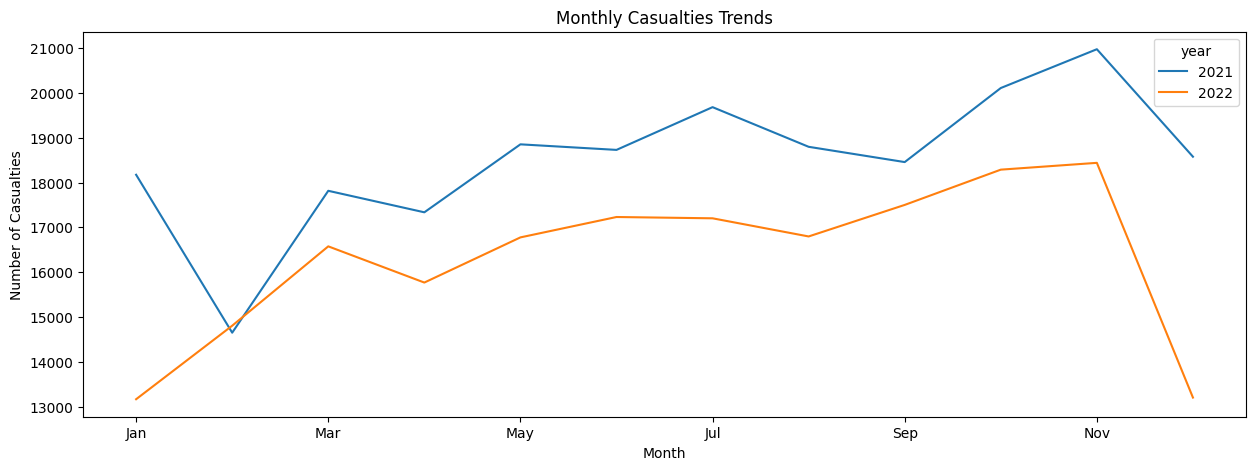

In [61]:
table_casualties_monthly.plot(title="Monthly Casualties Trends",xlabel="Month",ylabel="Number of Casualties", figsize=(15, 5))
plt.show()

<div style='color:DarkOrange'> Casualties by Road Type</div>

In [85]:
# Prepare the data
table_casualties_road_type = df_explore.loc[df_explore['road_type'] != 'Unknown',['road_type', 'number_of_casualties']].groupby(by='road_type').sum()
table_casualties_road_type = table_casualties_road_type.sort_values(by='number_of_casualties')

table_casualties_road_type

,number_of_casualties
road_type,
Slip road,4679
One way street,7389
Roundabout,26828
Dual carriageway,67368
Single carriageway,309698


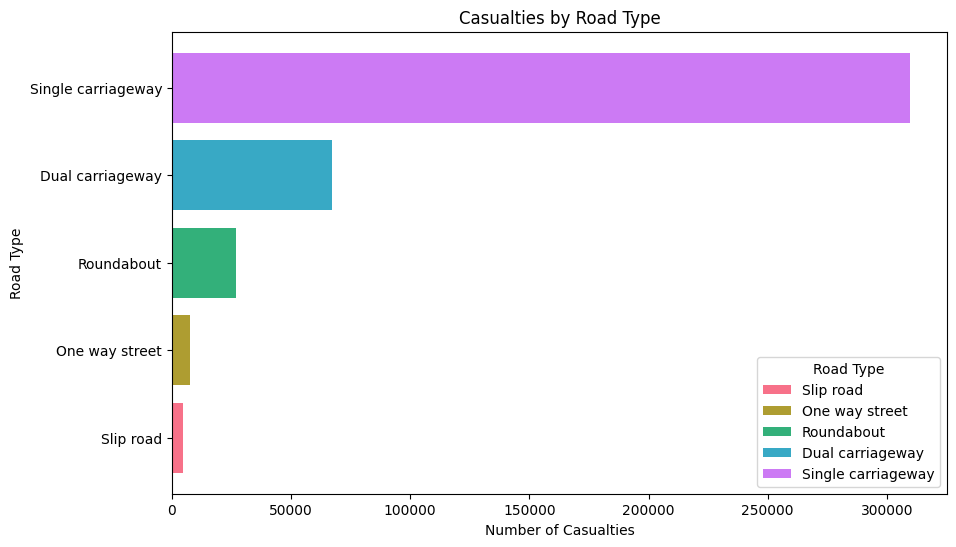

In [86]:
# Set a color palette
colors_table = sns.color_palette("husl", len(table_casualties_road_type))

# Plot each bar individually with a different color
plt.figure(figsize=(10, 6))
for i, (road_type, row) in enumerate(table_casualties_road_type.iterrows()):
    plt.barh(road_type, row['number_of_casualties'], color=colors_table[i], label=road_type)

# Add title and labels
plt.title('Casualties by Road Type')
plt.xlabel('Number of Casualties')
plt.ylabel('Road Type')
plt.legend(title="Road Type")
plt.show()

<div style='color:DarkOrange'> Casualties by Road Surface</div>

In [96]:
# Casualties by Road Surface Condition
table_casualties_road_surface = df_explore.loc[df_explore['road_condition'] !='Unknown' ,['road_condition', 'number_of_casualties']].groupby(by='road_condition').sum().sort_values(by='number_of_casualties', ascending=False)

table_casualties_road_surface

,number_of_casualties
road_condition,
Dry,279445
Damp,114697
Frost,16306
Snow,6475
Flood,564


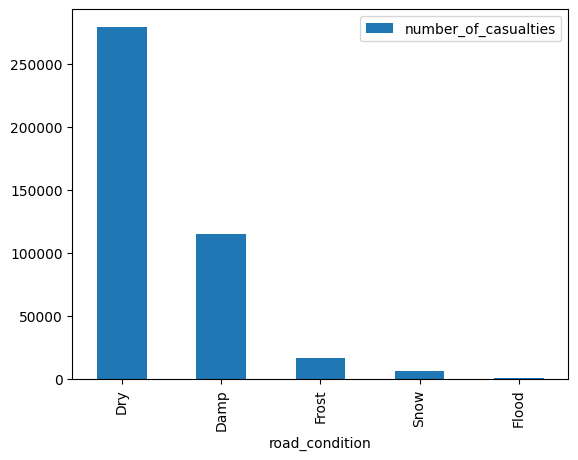

In [97]:
# Plot Casualties by Raod Surface Condition
table_casualties_road_surface.plot(kind='bar')
plt.show()

In [106]:
df_explore.set_index('road_condition').loc[:, ['number_of_casualties']].groupby('road_condition').sum()

,number_of_casualties
road_condition,
Damp,114697
Dry,279445
Flood,564
Frost,16306
Snow,6475
Unknown,396


<div style='color:DarkOrange'> Casualties by Location Type</div>

In [39]:
# Casualties by Location Type

<div style='color:DarkOrange'> Casualties by Time of Day</div>

In [40]:
# Casualties by Time of Day

## <span style="color:MediumSeaGreen">Data Visualization</span>

## <span style="color:MediumSeaGreen">Conclusion</span>

<span style="color:DarkOrange"> orange </span>
<span style="color:MediumSeaGreen"> green </span>
<span style="color:Tomato"> red </span>
<span style="color:DodgerBlue"> blue </span>
<span style="color:#9b59b6"> purple </span>
<span style="color:#1abc9c"> teal </span>
